# Overview Usage of the Main Lightning Data Classes

This notebook provides an overview of basic use of the base class `Ltg` provided by the `pyltg` package. 

The classes associated with lightning data all inherit this base class, so what we do here will follow
for others. Here, we'll use Lightning Mapping Array (LMA) data and the associated class as an example.

We'll assume you're already familiar with LMA data!

In [1]:
# First, imports we'll need

from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt 

import pyltg

In [2]:
# We'll assume you have all the data files in one place:
data_path = Path('./test_files').resolve()

In [3]:
# Get an LMA file and read it in
_file = 'nalma_lylout_20170427_07_3600.dat.gz'

lma = l = pyltg.LMA(data_path.joinpath(_file))

In [4]:
# First, let's see how much data is here:
lma.count

1639279

## Attributes of the data in the class

In [5]:
# The data can be accessed via attributes:
lma.lon, lma.lat

(array([-86.464321, -86.469929, -86.448781, ..., -87.148575, -87.445523,
        -87.445649]),
 array([34.455917, 34.459653, 34.431848, ..., 34.465879, 33.856113,
        33.826251]))

In [6]:
# Times are stored as np.datetime64:
lma.time

array(['2017-04-27T07:00:00.015569122', '2017-04-27T07:00:00.034944802',
       '2017-04-27T07:00:00.067639067', ...,
       '2017-04-27T07:59:59.783588237', '2017-04-27T07:59:59.818498185',
       '2017-04-27T07:59:59.927987161'], dtype='datetime64[ns]')

In [7]:
# To see all the fields stored in the data:
lma.columns

['time', 'lat', 'lon', 'alt', 'chi2', 'power', 'mask', 'active']

## Indexing the data

In [8]:
# If you want to get a few of the sources, we can do so through indexing.
# Let's you want the first ten sources:
lma[0:9]

# Note that this index is relative to "active" data - more on this in a bit

,time,lat,lon,alt,chi2,power,mask,active
0,2017-04-27 07:00:00.015569122,34.455917,-86.464321,7.5135,0.04,-4.8,e0141,True
1,2017-04-27 07:00:00.034944802,34.459653,-86.469929,7.9389,1.68,7.2,0b58,True
2,2017-04-27 07:00:00.067639067,34.431848,-86.448781,7.8235,0.23,-4.8,e0340,True
3,2017-04-27 07:00:00.400037661,32.005951,-88.310646,14.3979,0.22,10.8,e03c0,True
4,2017-04-27 07:00:00.425540159,32.003298,-88.350469,9.5435,0.91,20.0,e02e0,True
5,2017-04-27 07:00:00.730725357,34.487718,-86.959207,3.6695,0.41,10.2,a0169,True
6,2017-04-27 07:00:00.730809147,34.488455,-86.957782,3.8432,0.63,10.9,c0a68,True
7,2017-04-27 07:00:00.730940245,34.491870,-86.958382,3.3057,0.54,20.1,a02e8,True
8,2017-04-27 07:00:00.731614713,34.484965,-86.960463,3.1361,0.32,14.8,40b68,True


In [9]:
# For a quick look at the beginning of the data:
lma.head()

,time,lat,lon,alt,chi2,power,mask,active
0,2017-04-27 07:00:00.015569122,34.455917,-86.464321,7.5135,0.04,-4.8,e0141,True
1,2017-04-27 07:00:00.034944802,34.459653,-86.469929,7.9389,1.68,7.2,0b58,True
2,2017-04-27 07:00:00.067639067,34.431848,-86.448781,7.8235,0.23,-4.8,e0340,True
3,2017-04-27 07:00:00.400037661,32.005951,-88.310646,14.3979,0.22,10.8,e03c0,True
4,2017-04-27 07:00:00.425540159,32.003298,-88.350469,9.5435,0.91,20.0,e02e0,True


From these, you might be able to guess the underlying data is stored as a Pandas Dataframe.
But, the class is built in a way to make accessing a little easier via either "column" or "row".

## Limiting the "active" data

In [10]:
# Let's say you're only interested in a subset of the data, i.e., 
# you want to limit the data so that you're only looking at sources 
# between certain latitude, longitude, and altitude ranges
cnt = lma.limit(lat=[34.5, 34.6], lon=[-87.7, -87.5], alt=[0, 25])  # altitude is in km
cnt  # should be 5750

3991

In [11]:
# The limiting of the data doesn't actually get rid of anything. What we do is
# mark the data within the limits as "active". All data retrieval
# is relative to the "active" data:
lma.count, lma.lat

(3991,
 array([34.51509 , 34.55022 , 34.507622, ..., 34.559496, 34.524649,
        34.506413]))

In [12]:
# Ditto for indexing:
lma[0:9]

,time,lat,lon,alt,chi2,power,mask,active
19192,2017-04-27 07:00:54.619049966,34.515090,-87.543687,19.7816,1.89,21.6,e0620,True
79997,2017-04-27 07:03:01.556204442,34.550220,-87.558220,8.8169,0.26,18.2,e0888,True
80323,2017-04-27 07:03:01.613325797,34.507622,-87.518014,9.5101,0.67,6.6,60b01,True
89607,2017-04-27 07:03:22.341039941,34.557817,-87.647733,10.0176,1.29,13.1,c0838,True
125827,2017-04-27 07:04:43.166331421,34.513161,-87.514435,23.1899,0.18,10.0,e0141,True
217910,2017-04-27 07:07:00.463361328,34.507957,-87.651415,12.7117,0.70,19.1,a0560,True
222909,2017-04-27 07:07:12.144781901,34.546580,-87.574533,12.9629,1.71,9.3,083b,True
238061,2017-04-27 07:07:45.979414027,34.502196,-87.665290,15.4229,0.37,20.5,c05c0,True
238834,2017-04-27 07:07:46.169049951,34.502966,-87.657740,6.8255,0.84,13.2,201e1,True


## Plotting

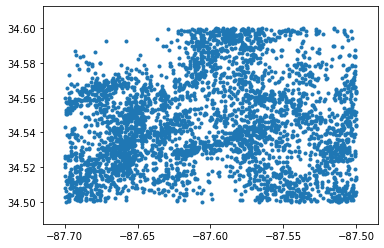

In [13]:
# With this, it's easy to make some plots (we'll just do basic plots, not maps):
fig, ax = plt.subplots() 
_ = ax.scatter(lma.lon, lma.lat, marker='.')

# Of course, you do fancier things, like density plots. But we'll
# save that as an exercise for the reader ;-)

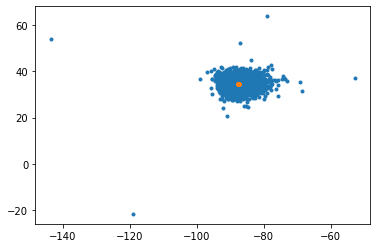

In [14]:
# If you ever need to get all the data after limiting, you can via the underlying data.
# Remember, we don't throw anything out.

# (This might take a moment - we're going to scatter plot >1.6 million points!)
fig, ax = plt.subplots() 
_ = ax.scatter(lma.data.lon, lma.data.lat, marker='.')  # all the data
_ = ax.scatter(lma.lon, lma.lat, marker='.')  # the data within limits


In [15]:
# Let's say you want reset the active data. Easy peasy:
lma.reset_active()
lma.count

1639279

### Plotting times

In [16]:
# Now, let's limit again, but focus on a 3 minute period:
t0 = np.datetime64('2017-04-27T07:10:00', 'ns')
t1 = np.datetime64('2017-04-27T07:13:00', 'ns')

# An important note is that the time limits need to be np.datetime64[ns] (the units are important!)
cnt = lma.limit(time=[t0, t1], alt=[0, 25])  # Go ahead and limit altitude too!
cnt

95939

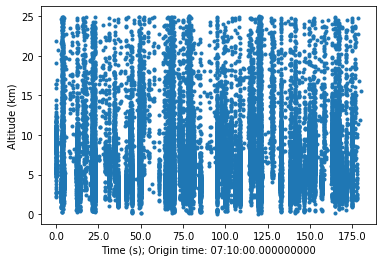

In [17]:
# Making a time plot with Matplotlib is, um, let's say problematic. Especially when
# dealing with data like this that spans less than a day. The `pytlg` package provides 
# a way to make plots a little easier. 

# But, we still rely on Matplotlib, and it doesn't handle np.datetime very well in general.
# So, we'll cast it to an 64 bit integer. Alternatively, you can cast to a datetime.date.
# See https://matplotlib.org/3.1.1/gallery/recipes/common_date_problems.html

from pyltg.utilities import plotting as ltg_plt

fig, ax = plt.subplots()
_ = ax.scatter(lma.time.astype('int64'), lma.alt, marker='.')
ltg_plt.time_axis(ax.xaxis)
_ = ax.set_ylabel('Altitude (km)')


## Manipulating the data

Basically, you shouldn't do this! But if you try, you won't get the expected results.

In [18]:
lma[0].lat = 34.0
lma[0]  # Silently ignored

time      2017-04-27 07:10:00.000181658
lat                             34.3896
lon                            -86.8942
alt                              5.4158
chi2                               0.92
power                              -3.8
mask                              e02a0
active                             True
Name: 303013, dtype: object

In [19]:
lma.lat[0] = 34.0
lma[0]  # Also silently ignored

time      2017-04-27 07:10:00.000181658
lat                             34.3896
lon                            -86.8942
alt                              5.4158
chi2                               0.92
power                              -3.8
mask                              e02a0
active                             True
Name: 303013, dtype: object

In [20]:
# If you want to do something with the data, you'll have to get it "out" of the class:
ltg_data = lma.get_active()  # returns a copy of the data, as a Pandas Dataframe

In [22]:
# Because it's a Dataframe, you won't be able to do this anymore:
# ltg_data[0]

# But you can manipulate it like you would any Dataframe:
ltg_data.loc[0, 'lat'] = 34.0
ltg_data.lat[0]